In [13]:
import os
import numpy as np
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats("svg")

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体为微软雅黑
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

log_path = (
    "./runs/Apr19_08-52-48_dbcloud"  # Modify this to your TensorBoard log directory
)

# Initialize an event accumulator
event_acc = EventAccumulator(log_path)
event_acc.Reload()  # Loads all the data from the directory

# List all tags in the log file
print(event_acc.Tags()["scalars"])

['aspect_accuracy', 'score_rmse', 'batch loss', 'training loss']


In [14]:
def get_item(tag):
    # E.g. get all scalar data under 'train_loss' tag
    scalar_data = event_acc.Scalars(tag)
    steps = []
    values = []
    for scalar in scalar_data:
        steps.append(scalar.step)
        values.append(scalar.value)
    return steps, values

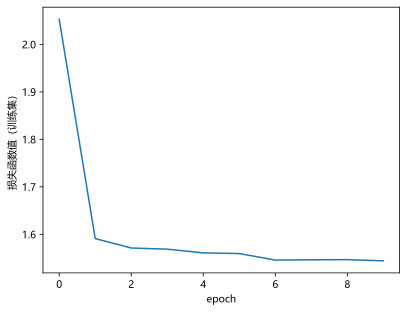

In [34]:
_, values = get_item("training loss")
steps = np.arange(len(values))
plt.plot(steps, values)
plt.xlabel("epoch")
plt.ylabel("损失函数值（训练集）")

plt.show()

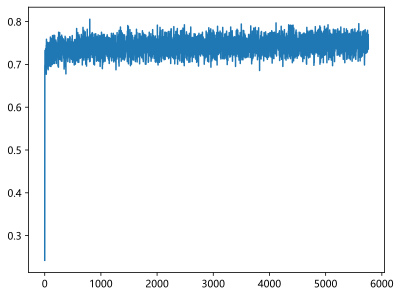

In [33]:
_, values = get_item("aspect_accuracy")
values = values
steps = np.arange(len(values))
plt.plot(steps, values)

In [20]:
values[1:11]

[80.93920135498047,
 16.224987030029297,
 8.880248069763184,
 33.31778335571289,
 22.425067901611328,
 6.5450544357299805,
 2.0977978706359863,
 5.960272789001465,
 10.03762149810791,
 10.175993919372559]